Accuracy: 0.8348868175765646
Precision: 0.8851369174049685
Recall: 0.8236200562832392



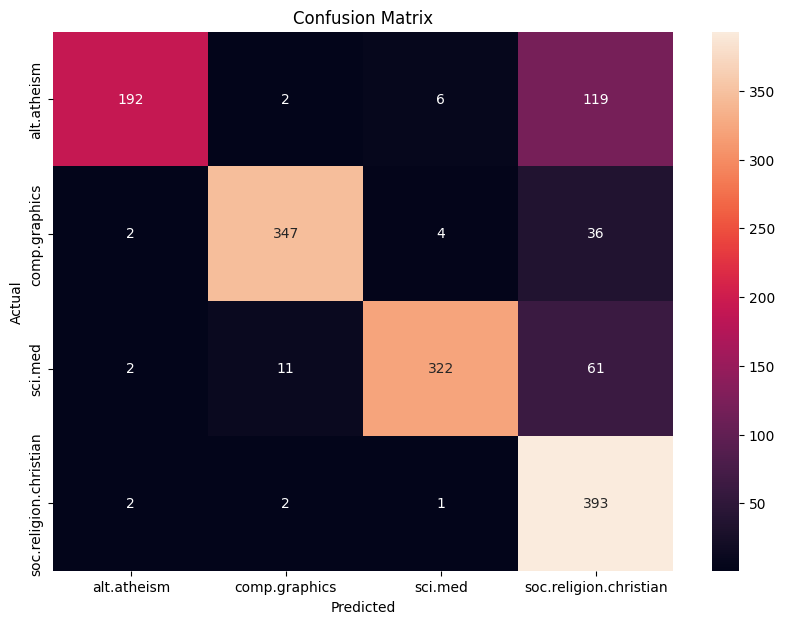

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Create a pipeline to vectorize the text, then train and fit a model
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(newsgroups_train.data, newsgroups_train.target)

# Predict the test set
predicted = text_clf.predict(newsgroups_test.data)

# Evaluate the model
accuracy = accuracy_score(newsgroups_test.target, predicted)
precision = precision_score(newsgroups_test.target, predicted, average='macro')
recall = recall_score(newsgroups_test.target, predicted, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print()
# Plot the confusion matrix
conf_mat = confusion_matrix(newsgroups_test.target, predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
